# Não linear com Decision Tree

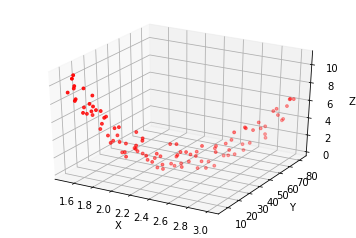

In [242]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

np.random.seed(42)
X = np.linspace(1.5,3.0,num=100)
Y = np.array([x**4 + (np.random.rand()*6.5) for x in X])
Z = np.array([(x[i]*y[i]) + (np.random.rand()*3.2) for i in range(0,100)])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r',s=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Dados bidimensionais

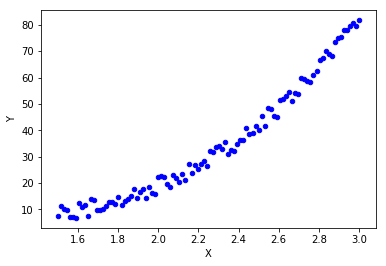

In [212]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, Y, c='b', s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')


## Decision Tree Regressor com uma variável

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [214]:
Xreshaped = X_train.reshape(-1,1) # DecisionTreeRegressor expects 2d array...
dtrModel = DecisionTreeRegressor(max_depth=2, random_state=42)
dtrModel.fit(Xreshaped,y_train)
dtrModel5 = DecisionTreeRegressor(max_depth=5, random_state=42)
dtrModel5.fit(Xreshaped,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [260]:
print('R2',dtrModel.score(Xreshaped,y_train))

R2 0.950115536188


In [261]:
print('R2',dtrModel5.score(Xreshaped,y_train))

R2 0.998122469992


In [262]:
xscores = cross_val_score(dtrModel,Xreshaped,y_train)
print(xscores)

[ 0.94186     0.90328405  0.95597184]


In [263]:
xscores = cross_val_score(dtrModel5,Xreshaped,y_train)
print(xscores)

[ 0.97922115  0.97695241  0.99242184]


In [264]:
from sklearn import tree
from os import system
dt2file = open("dt2.dot", 'w')
dt2graph = tree.export_graphviz(dtrModel, out_file = dt2file, feature_names = ['X'])
dt2file.close()
system("dot -Tpng dt2.dot -o dt2.png")

0

### Max depth = 2

In [265]:
# ![Max depth 2](dt2.png)

![Max depth 2](dt2.png)

In [271]:
dt5file = open("dt5.dot", 'w')
dt5graph = tree.export_graphviz(dtrModel5, out_file = dt5file, feature_names = ['X'])
dt5file.close()
system("dot -Tpng dt5.dot -o dt5.png")

0

### Max depth = 5

In [272]:
# ![max depth 5](dt5.png)

![max depth 5](./dt5.png 'Max depth = 5' )

## Plotando...

In [219]:
yhat = dtrModel.predict(X_test.reshape(-1,1))
yhat5 = dtrModel5.predict(X_test.reshape(-1,1))

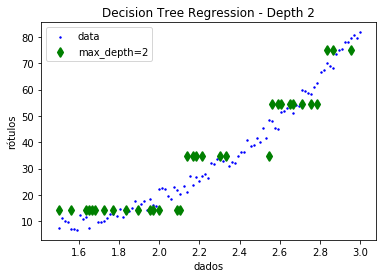

In [220]:
plt.figure()
plt.scatter(X, Y, s=2, c='b', label="data")
plt.scatter(X_test, yhat, color="green", marker='d',
         label="max_depth=2", linewidth=2)
plt.xlabel("dados")
plt.ylabel("rótulos")
plt.title("Decision Tree Regression - Depth 2")
plt.legend()

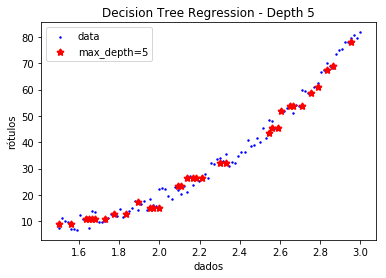

In [221]:
plt.figure()
plt.scatter(X, Y, s=2, c='b', label="data")
plt.scatter(X_test, yhat5, color="r", marker='*',
         label="max_depth=5", linewidth=2)
plt.xlabel("dados")
plt.ylabel("rótulos")
plt.title("Decision Tree Regression - Depth 5")
plt.legend()

## Dados tridimensionais

In [222]:
features = pd.DataFrame({'X':X, 'Z':Z})

In [223]:
labels = pd.DataFrame({'Y':Y})

In [224]:
features.head()

,X,Z
0,1.500000,9.100573
1,1.515152,10.739013
2,1.530303,9.415939
3,1.545455,9.749926
4,1.560606,10.744213


In [225]:
labels.head()

,Y
0,7.497011
1,11.449809
2,10.242116
3,9.595877
4,6.945739


In [226]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [227]:
dtr3d = DecisionTreeRegressor(max_depth=4, random_state=42)
dtr3d.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [228]:
print('R2',dtr3d.score(X_train,y_train))

R2 0.996323878358


In [229]:
xscores3d = cross_val_score(dtr3d,X_train,y_train)
print(xscores3d)

[ 0.97940543  0.98021599  0.98983185]


In [230]:
yhat3d = dtr3d.predict(X_test)


### Plotando

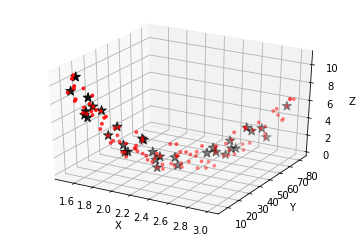

In [240]:
fig = plt.figure()
ax = ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r',s=8)
ax.scatter(X_test['X'], yhat3d, X_test['Z'], c='k', marker='*',s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
